In [80]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(
    { "figure.figsize": (6, 4) },
    style='ticks',
    color_codes=True,
    font_scale=0.8
)
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, ParameterGrid

import sys
import dtreeviz

In [81]:
auto = pd.read_csv("adverts.csv")
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


In [82]:
auto = auto.loc[auto["price"]<1e5]

In [83]:
auto = auto.drop(columns=["standard_colour", "standard_model"])

In [84]:
auto = auto.dropna()

In [85]:
auto.sample(10)

,public_reference,mileage,reg_code,standard_make,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
223830,202007010730300,27535.0,66,SKODA,USED,2016.0,12890,Hatchback,False,Diesel
86691,202010134954210,18810.0,66,BMW,USED,2016.0,12499,Hatchback,False,Petrol
106587,202009153753012,64000.0,09,Dodge,USED,2009.0,4995,SUV,False,Diesel
164825,202007231613627,8682.0,15,Peugeot,USED,2015.0,6995,Hatchback,False,Petrol
93818,202009214011625,33871.0,18,Mazda,USED,2018.0,10829,Hatchback,False,Petrol
116500,202009224071610,50982.0,63,Volkswagen,USED,2014.0,6595,Hatchback,False,Petrol
362459,202002207542797,3008.0,69,Mitsubishi,USED,2019.0,24000,SUV,False,Petrol
199441,202008032033744,23445.0,68,Nissan,USED,2018.0,15600,SUV,False,Diesel
191820,202010054618871,28993.0,65,Audi,USED,2015.0,17500,SUV,False,Petrol
150008,202010134952894,31000.0,17,Hyundai,USED,2017.0,15999,SUV,False,Diesel


In [86]:
def map_to_int(str_list):
    map_dict = {}
    for i, value in enumerate(str_list):
        map_dict[value] = i
    return map_dict

# Map str values to integers
for column in ["standard_make", "reg_code", "body_type", "fuel_type", "crossover_car_and_van", "vehicle_condition"]:
    mapping_dict = map_to_int(auto[column].unique())                            
    auto[column] = auto[column].replace(to_replace=mapping_dict)

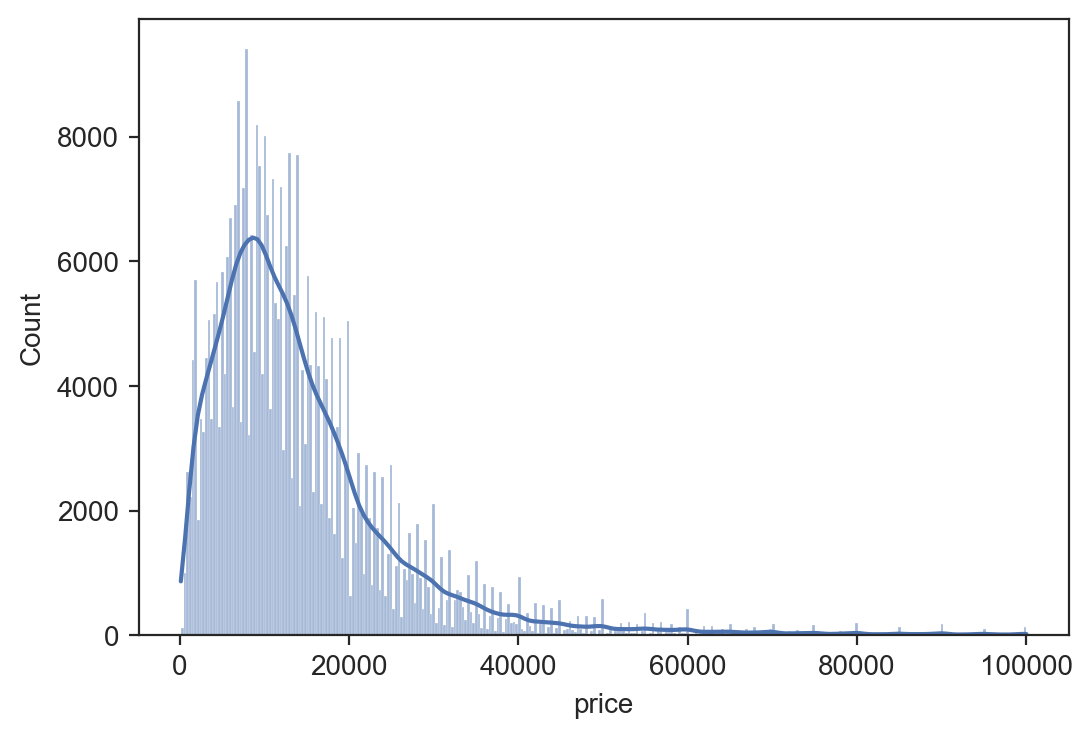

In [87]:
sns.histplot(data=auto, kde=True, x="price");

In [88]:
auto.sample(10)

,public_reference,mileage,reg_code,standard_make,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
366630,202010064679968,30000.0,18,17,0,2017.0,10495,6,0,1
350915,202010305625077,53290.0,10,4,0,2012.0,13699,0,0,1
89882,202009043295039,2096.0,23,16,0,2020.0,31450,5,0,1
267324,202010275471927,47755.0,12,30,0,2015.0,3650,2,0,1
394948,202010305610103,111000.0,5,1,0,2008.0,1595,2,0,1
180272,202009224053952,77546.0,16,11,0,2014.0,14499,6,0,0
169573,202008042072122,1800.0,6,7,0,2019.0,15495,6,0,1
80164,202008252921086,8423.0,6,8,0,2019.0,12600,2,0,0
322591,202010094796051,32685.0,18,11,0,2017.0,11700,1,0,0
229870,202010305597998,48763.0,3,18,0,2014.0,6300,2,0,0


In [89]:
X, y = auto.drop(columns="price"), auto["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [90]:
knnr = KNeighborsRegressor(n_neighbors=45)

knnr.fit(X_train, y_train)
knnr.score(X_train, y_train), knnr.score(X_test, y_test)

(0.26761395428508805, 0.23133476743512615)

In [91]:
X.head()

,public_reference,mileage,reg_code,standard_make,vehicle_condition,year_of_registration,body_type,crossover_car_and_van,fuel_type
1,202007020778260,108230.0,0,0,0,2011.0,0,0,0
2,202007020778474,7800.0,1,1,0,2017.0,1,0,1
3,202007080986776,45000.0,2,2,0,2016.0,2,0,0
4,202007161321269,64000.0,3,3,0,2015.0,1,0,0
5,202009304412074,16000.0,1,4,0,2017.0,3,0,1


In [92]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.2 * (1 - .2)))
sel.fit_transform(X)

array([[2.02007021e+14, 1.08230000e+05, 0.00000000e+00, ...,
        2.01100000e+03, 0.00000000e+00, 0.00000000e+00],
       [2.02007021e+14, 7.80000000e+03, 1.00000000e+00, ...,
        2.01700000e+03, 1.00000000e+00, 1.00000000e+00],
       [2.02007081e+14, 4.50000000e+04, 2.00000000e+00, ...,
        2.01600000e+03, 2.00000000e+00, 0.00000000e+00],
       ...,
       [2.02010316e+14, 5.27600000e+04, 2.50000000e+01, ...,
        2.01200000e+03, 1.00000000e+00, 1.00000000e+00],
       [2.02011016e+14, 1.02500000e+04, 1.20000000e+01, ...,
        2.01500000e+03, 2.00000000e+00, 1.00000000e+00],
       [2.01512149e+14, 1.40000000e+04, 1.60000000e+01, ...,
        2.01400000e+03, 5.00000000e+00, 0.00000000e+00]])

In [93]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
# Don't cheat - fit only on training data
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
# apply same transformation to test data
X_test = scaler.transform(X_test)  

In [94]:
from sklearn.neural_network import MLPRegressor
nn = MLPRegressor(
    activation='relu',
    hidden_layer_sizes=(10, 100),
    alpha=0.001,
    random_state=20,
    early_stopping=False
)

nn.fit(X_train, y_train)
nn.score(X_train, y_train), nn.score(X_test, y_test)

(0.5565259628331962, 0.54858777574552)